## Week 10 Activity
## Team 1
## Contributors : Nikhil Perumpulavil, Sreelekshmy S L , Arjun B K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Load the data into the pandas environment and identify some basic details of the dataset.



In [2]:
data = pd.read_csv('employee.csv')

In [3]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [5]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [6]:
data.shape

(9, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


### 2) Reset the index as "name" as the index


In [8]:
data =pd.read_csv('employee.csv',index_col='name')
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3) Select rows for specific names Jack Morgan and Josh wills

In [9]:
data.loc[['Jack Morgan', 'Josh Wills'], :]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [10]:
data[(data['department'] == 'Sales') | (data['department'] == 'Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score

In [11]:
data.loc[(data['performance_score'] > 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [12]:
data.loc[(data['performance_score'] > 500) & (data['performance_score'] < 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset

In [13]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

#### Replace  gender column with mode, and other columns with median/mean

In [14]:
data['gender'].mode()

0    F
dtype: object

In [15]:
data['gender'].fillna('F', inplace = True)

In [16]:
data['age'].fillna(data['age'].mean(), inplace = True)

In [17]:
#since there is outlier in income replace with median
data['income'].fillna(data['income'].median(), inplace = True)

In [18]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### 8. Check the outliers and handle outliers in performance score using Percentiles.

### Age

<AxesSubplot:xlabel='age'>

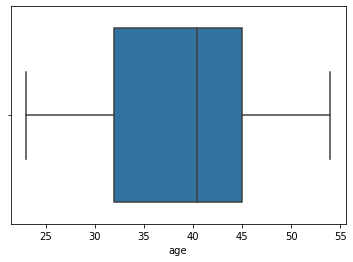

In [19]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(data['age'])

No outliers found in age

### Performance score

<AxesSubplot:xlabel='performance_score'>

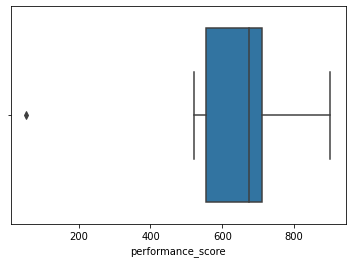

In [20]:
sns.boxplot(data['performance_score'])

#### There is an outlier in performance_score. Hence we will handle it using IQR

In [21]:
Q1 = np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in data['performance_score']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
outlier 

[53]

In [22]:
low_data = data['performance_score'] < low_limit
data.loc[low_data].index

Index(['James Authur'], dtype='object', name='name')

In [23]:
data.loc[low_data]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


### Since the performance score is very low we will replace it with the mean performance score for the grade G3 

In [24]:
g3 = data[data['grade']=='G3']['performance_score'].mean()
g3

576.4

In [25]:
data['performance_score'].replace({53 : 576.4},inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723.0
S Kumar,40.428571,16000.0,F,Finance,G0,520.0
Jack Morgan,32.000000,35000.0,M,Finance,G2,674.0
Ying Chin,45.000000,65000.0,F,Sales,G3,556.0
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711.0
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649.0
James Authur,54.000000,52000.0,F,Operations,G3,576.4
Josh Wills,54.000000,52000.0,F,Finance,G3,901.0
Leo Duck,23.000000,98000.0,M,Sales,G4,709.0


### Income

<AxesSubplot:xlabel='income'>

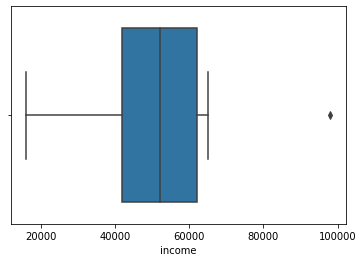

In [26]:
sns.boxplot(data['income'])

In [27]:
Q1 = np.percentile(data['income'],25,interpolation='midpoint')
Q2 = np.percentile(data['income'],50,interpolation='midpoint')
Q3 = np.percentile(data['income'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in data['income']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
outlier  

[98000.0]

In [28]:
up_data = data['income'] > up_limit
data.loc[up_data].index

Index(['Leo Duck'], dtype='object', name='name')

In [29]:
data.loc[up_data]

,age,income,gender,department,grade,performance_score
name,,,,,,
Leo Duck,23.0,98000.0,M,Sales,G4,709.0


In [30]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723.0
S Kumar,40.428571,16000.0,F,Finance,G0,520.0
Jack Morgan,32.000000,35000.0,M,Finance,G2,674.0
Ying Chin,45.000000,65000.0,F,Sales,G3,556.0
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711.0
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649.0
James Authur,54.000000,52000.0,F,Operations,G3,576.4
Josh Wills,54.000000,52000.0,F,Finance,G3,901.0
Leo Duck,23.000000,98000.0,M,Sales,G4,709.0


#### Here we cannot drop the outlier as there is only 9 rows present.
#### Also since the grade of the person named 'Leo Duck' is different from others so we cannot replace it with any other values so we keep the data as it is.

### 9. Check the gender column and do Dummy encoding.

In [31]:
data['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [32]:
data1 = pd.get_dummies(data,columns=['gender'])
data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.000000,52000.0,Operations,G3,723.0,1,0
S Kumar,40.428571,16000.0,Finance,G0,520.0,1,0
Jack Morgan,32.000000,35000.0,Finance,G2,674.0,0,1
Ying Chin,45.000000,65000.0,Sales,G3,556.0,1,0
Dheeraj Patel,30.000000,42000.0,Operations,G2,711.0,1,0
Satyam Sharma,40.428571,62000.0,Sales,G3,649.0,1,0
James Authur,54.000000,52000.0,Operations,G3,576.4,1,0
Josh Wills,54.000000,52000.0,Finance,G3,901.0,1,0
Leo Duck,23.000000,98000.0,Sales,G4,709.0,0,1


### 10.Do the standard scaling on the feature performance score.

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(data1[['performance_score']])
data1['performance_score']=scaled_data

In [37]:
data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.000000,52000.0,Operations,G3,0.503817,1,0
S Kumar,40.428571,16000.0,Finance,G0,-1.383946,1,0
Jack Morgan,32.000000,35000.0,Finance,G2,0.048150,0,1
Ying Chin,45.000000,65000.0,Sales,G3,-1.049170,1,0
Dheeraj Patel,30.000000,42000.0,Operations,G2,0.392225,1,0
Satyam Sharma,40.428571,62000.0,Sales,G3,-0.184333,1,0
James Authur,54.000000,52000.0,Operations,G3,-0.859464,1,0
Josh Wills,54.000000,52000.0,Finance,G3,2.159096,1,0
Leo Duck,23.000000,98000.0,Sales,G4,0.373626,0,1
